In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

import warnings # supress warnings
warnings.filterwarnings('ignore')

## Parte 1: Análise Exploratória 

### Dados históricos de 10 criptomoedas entre 2019 e 2021

In [2]:
df_ada = pd.read_excel('datasets/investing/ADA_USD Binance Dados Históricos.xlsx')
df_bch = pd.read_excel('datasets/investing/BCH_USD Huobi Dados Históricos.xlsx')
df_bnb = pd.read_excel('datasets/investing/BNB_USD Binance Dados Históricos.xlsx')
df_btc = pd.read_excel('datasets/investing/BTC USD Binance Dados Historicos.xlsx')
df_eth = pd.read_excel('datasets/investing/ETH_USD Binance Dados Históricos.xlsx')
df_ltc = pd.read_excel('datasets/investing/LTC_USD Binance Dados Históricos.xlsx')
df_trx = pd.read_excel('datasets/investing/TRX_USD Binance Dados Históricos.xlsx')
df_usdt = pd.read_excel('datasets/investing/USDT USD Investing Dados Históricos.xlsx')
df_xlm = pd.read_excel('datasets/investing/XLM_USD Binance Dados Históricos.xlsx')
df_xlp = pd.read_excel('datasets/investing/XRP_USD Binance Dados Históricos.xlsx')

In [3]:
df_ada['Data'] = pd.to_datetime(df_ada['Data'])
df_bch['Data'] = pd.to_datetime(df_bch['Data'])
df_bnb['Data'] = pd.to_datetime(df_bnb['Data'])
df_btc['Data'] = pd.to_datetime(df_btc['Data'])
df_eth['Data'] = pd.to_datetime(df_eth['Data'])
df_ltc['Data'] = pd.to_datetime(df_ltc['Data'])
df_trx['Data'] = pd.to_datetime(df_trx['Data'])
df_usdt['Data'] = pd.to_datetime(df_usdt['Data'])
df_xlm['Data'] = pd.to_datetime(df_xlm['Data'])
df_xlp['Data'] = pd.to_datetime(df_xlp['Data'])

In [4]:
df_ada = df_ada.query('Data >= "01-01-2019"')
df_bch = df_bch.query('Data >= "01-01-2019"')
df_bnb = df_bnb.query('Data >= "01-01-2019"')
df_btc = df_btc.query('Data >= "01-01-2019"')
df_eth = df_eth.query('Data >= "01-01-2019"')
df_ltc = df_ltc.query('Data >= "01-01-2019"')
df_trx = df_trx.query('Data >= "01-01-2019"')
df_usdt = df_usdt.query('Data >= "01-01-2019"')
df_xlm = df_xlm.query('Data >= "01-01-2019"')
df_xlp = df_xlp.query('Data >= "01-01-2019"')

In [5]:
df_ada['pair'] = 'ADA/USD'
df_bch['pair'] = 'BCH/USD'
df_bnb['pair'] = 'BNB/USD'
df_btc['pair'] = 'BTC/USD'
df_eth['pair'] = 'ETH/USD'
df_ltc['pair'] = 'LTC/USD'
df_trx['pair'] = 'TRX/USD'
df_usdt['pair'] = 'USDT/USD'
df_xlm['pair'] = 'XLM/USD'
df_xlp['pair'] = 'XLP/USD'

In [6]:
df_fechamento = pd.DataFrame()
df_fechamento['#'] = df_ada['#']
df_fechamento['date'] = df_ada['Data']
df_fechamento['ADA'] = df_ada['Último']
df_fechamento['BCH'] = df_bch['Último']
df_fechamento['BNB'] = df_bnb['Último']
df_fechamento['BTC'] = df_btc['Último']
df_fechamento['ETH'] = df_eth['Último']
df_fechamento['LTC'] = df_ltc['Último']
df_fechamento['TRX'] = df_trx['Último']
df_fechamento['USDT'] = df_usdt['Último']
df_fechamento['XLM'] = df_xlm['Último']
df_fechamento['XLP'] = df_xlp['Último']
df_fechamento.sort_values(by=['#'], inplace=True, ascending=False, ignore_index=True)

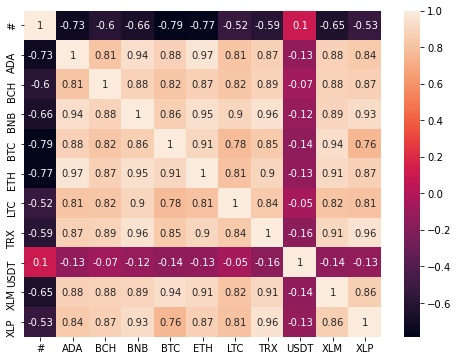

In [7]:
corr_fechamento = df_fechamento.corr(method='pearson')

plt.figure(figsize=(8, 6))
sb.heatmap(corr_fechamento, annot=True)
plt.show()

In [9]:
df_fechamento_norm = minmax_scale(df_fechamento.drop(columns=['#', 'date']))
print(df_fechamento_norm.shape)
df_fechamento_norm = pd.DataFrame(df_fechamento_norm, columns=['ADA', 'BCH', 'BNB', 'BTC', 'ETH', 'LTC', 'TRX', 'USDT', 'XLM', 'XLP'])

(963, 10)


<AxesSubplot:>

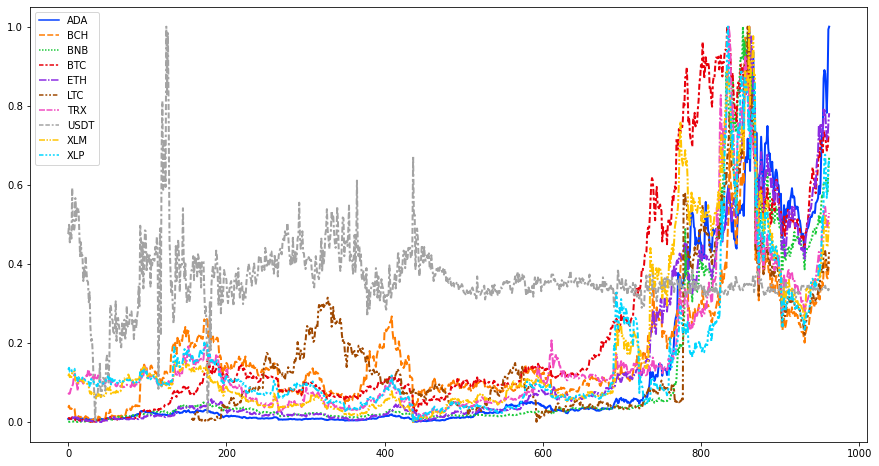

In [10]:
plt.figure(figsize=(15,8))
sb.lineplot(data=df_fechamento_norm.loc[:, 'ADA':'XLP'], palette="bright", linewidth=2)

<AxesSubplot:>

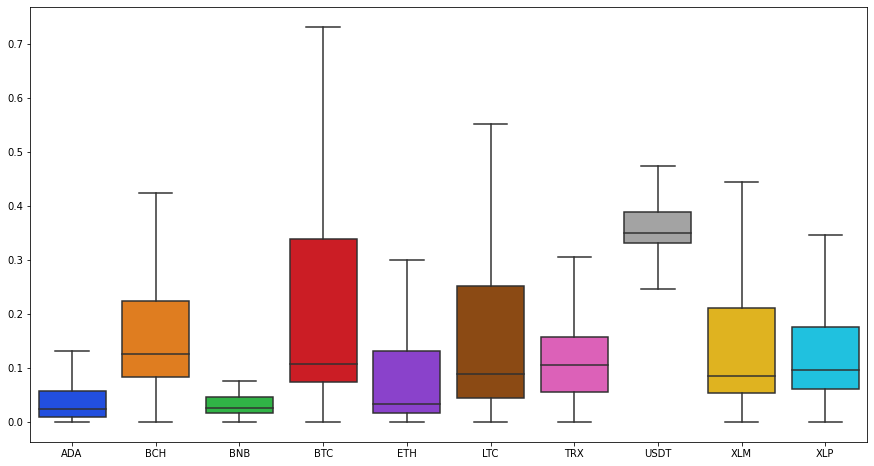

In [11]:
plt.figure(figsize=(15,8))
sb.boxplot(data=df_fechamento_norm.loc[:, 'ADA':'XLP'], palette="bright", showfliers=False)

In [12]:
lista_medias = df_fechamento.loc[:, 'ADA':'XLP'].mean().tolist()
lista_desvios = df_fechamento.loc[:, 'ADA':'XLP'].std().tolist()
lista_medianas = df_fechamento.loc[:, 'ADA':'XLP'].median().tolist()
lista_maximos = df_fechamento.loc[:, 'ADA':'XLP'].max().tolist()
lista_minimos = df_fechamento.loc[:, 'ADA':'XLP'].min().tolist()
parametros = pd.DataFrame()
parametros['pair'] = ['ADA', 'BCH', 'BNB', 'BTC', 'ETH', 'LTC', 'TRX', 'USDT', 'XLM', 'XLP']
parametros['mean'] = lista_medias
parametros['std'] = lista_desvios
parametros['median'] = lista_medianas
parametros['max'] = lista_maximos
parametros['min'] = lista_minimos
parametros

,pair,mean,std,median,max,min
0,ADA,0.343026,0.536552,0.08250,2.45520,0.02313
1,BCH,351.662555,201.238749,289.54000,1547.79000,109.60000
2,BNB,89.410571,146.276439,23.06000,676.12000,5.47000
3,BTC,17681.678505,16066.947484,9898.80000,63518.00000,3436.10000
4,ETH,704.172839,892.183702,240.89000,4173.78000,104.42000
5,LTC,92.149405,66.210478,61.65000,387.96000,29.58000
6,TRX,0.033573,0.027349,0.02480,0.16381,0.00843
7,USDT,1.001321,0.003566,1.00090,1.02880,0.98590
8,XLM,0.156491,0.143012,0.09110,0.73068,0.03206
9,XLP,0.399244,0.291914,0.29787,1.83486,0.13566


<AxesSubplot:xlabel='pair', ylabel='mean'>

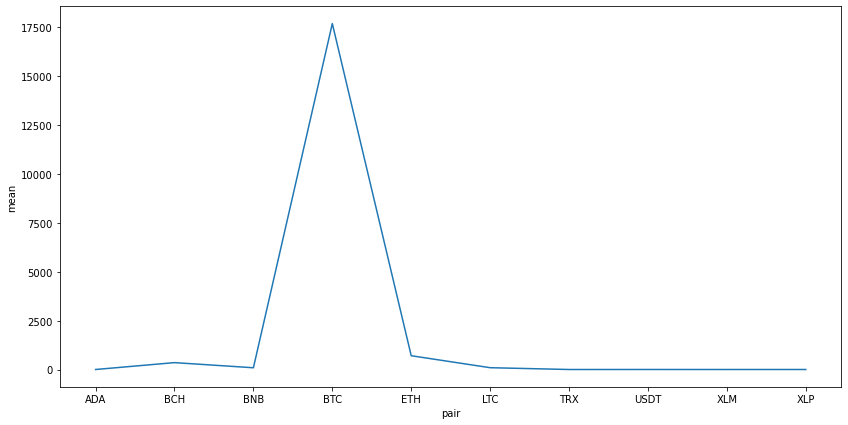

In [19]:
plt.figure(figsize=(14,7))
sb.lineplot(data=parametros, x='pair', y='mean')

array([<AxesSubplot:title={'center':'mean'}, xlabel='pair'>,
       <AxesSubplot:title={'center':'std'}, xlabel='pair'>,
       <AxesSubplot:title={'center':'median'}, xlabel='pair'>,
       <AxesSubplot:title={'center':'max'}, xlabel='pair'>,
       <AxesSubplot:title={'center':'min'}, xlabel='pair'>], dtype=object)

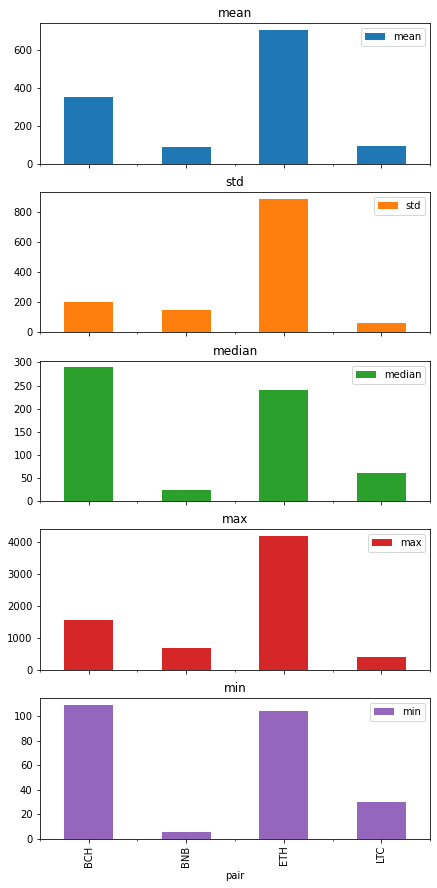

In [12]:
parametros_1 = parametros.query('pair == "BCH" | pair == "BNB" | pair == "ETH" | pair == "LTC"')
parametros_1.plot.bar(x='pair', subplots=True, figsize=(7,15))

array([<AxesSubplot:title={'center':'mean'}, xlabel='pair'>,
       <AxesSubplot:title={'center':'std'}, xlabel='pair'>,
       <AxesSubplot:title={'center':'median'}, xlabel='pair'>,
       <AxesSubplot:title={'center':'max'}, xlabel='pair'>,
       <AxesSubplot:title={'center':'min'}, xlabel='pair'>], dtype=object)

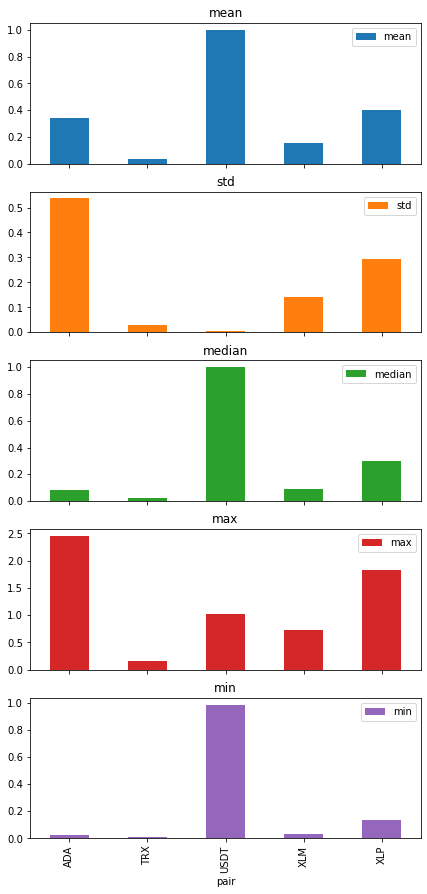

In [13]:
parametros_2 = parametros.query('pair == "ADA" | pair == "TRX" | pair == "USDT" | pair == "XLM" | pair == "XLP"')
parametros_2.plot.bar(x='pair', subplots=True, figsize=(7,15))

## Parte 2: Modelo de Regressão

### Prevendo o preço de fechamento do Bitcoin a partir de outras criptomoedas

In [14]:
df_fechamento_norm.fillna(df_fechamento_norm.mean(), inplace=True)

In [15]:
X = df_fechamento_norm.drop(columns='BTC').values #variavel preditora = X = features
Y =  df_fechamento_norm['BTC'] # Y = target = 

In [16]:
X

array([[7.75882273e-03, 3.63164811e-02, 7.75367181e-04, ...,
        4.75524476e-01, 1.16572672e-01, 1.32303437e-01],
       [8.71685437e-03, 4.11976164e-02, 8.64832625e-04, ...,
        4.98834499e-01, 1.21009991e-01, 1.37176318e-01],
       [7.75882273e-03, 3.40427899e-02, 4.77149035e-04, ...,
        4.54545455e-01, 1.13566746e-01, 1.27507062e-01],
       ...,
       [8.58433351e-01, 3.63276062e-01, 5.82971744e-01, ...,
        3.35664336e-01, 4.43903696e-01, 5.93538136e-01],
       [9.93174539e-01, 3.82835369e-01, 6.35115187e-01, ...,
        3.33333333e-01, 4.79674215e-01, 6.46975047e-01],
       [1.00000000e+00, 4.06309319e-01, 6.70111086e-01, ...,
        3.37995338e-01, 5.05038504e-01, 6.63571092e-01]])

In [17]:
Y

0      0.008770
1      0.010193
2      0.008107
3      0.008635
4      0.007904
         ...   
958    0.707433
959    0.686761
960    0.687527
961    0.721164
962    0.729163
Name: BTC, Length: 963, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [19]:
degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10]

y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)
    
    train_r2 = round(metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, train_r2, test_r2))

Polynomial degree 2: train score=0.99, test score=0.98
Polynomial degree 3: train score=1.0, test score=0.71
Polynomial degree 4: train score=1.0, test score=-480481.59
Polynomial degree 5: train score=1.0, test score=-686817.7
Polynomial degree 6: train score=1.0, test score=-882524.07
Polynomial degree 7: train score=1.0, test score=-1884864.29
Polynomial degree 8: train score=1.0, test score=-7023995.97
Polynomial degree 9: train score=1.0, test score=-15945210.94
Polynomial degree 10: train score=1.0, test score=-26931531.51


In [20]:
lr = LinearRegression()

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores_train = np.round(cross_val_score(lr, X_train, y_train, scoring='r2', cv=folds),2)
scores_test = np.round(cross_val_score(lr, X_test, y_test, scoring='r2', cv=folds), 2)

for i in range(0,len(scores_test)):
    print("Fold {0}: train score={1}, test score={2}".format(i, scores_train[i], scores_test[i]))

print("Average score: train score={0}, test score={1}".format(np.round(scores_train.mean(),2), np.round(scores_test.mean(), 2)))

Fold 0: train score=0.9, test score=0.9
Fold 1: train score=0.91, test score=0.96
Fold 2: train score=0.95, test score=0.93
Fold 3: train score=0.91, test score=0.82
Fold 4: train score=0.91, test score=0.96
Fold 5: train score=0.94, test score=0.96
Fold 6: train score=0.94, test score=0.95
Fold 7: train score=0.95, test score=0.94
Fold 8: train score=0.92, test score=0.91
Fold 9: train score=0.93, test score=0.93
Average score: train score=0.93, test score=0.93


In [ ]:
lr_predictions = cross_val_predict(lr, X_test, y_test, cv=folds)
lr_predictions

In [21]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9380457248617988

In [22]:
mlpr = MLPRegressor(hidden_layer_sizes=(50, 10, 50), activation='relu', solver='lbfgs', max_iter=1000)

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores_train = np.round(cross_val_score(mlpr, X_train, y_train, scoring='r2', cv=folds),2)
scores_test = np.round(cross_val_score(mlpr, X_test, y_test, scoring='r2', cv=folds), 2)

for i in range(0,len(scores_test)):
    print("Fold {0}: train score={1}, test score={2}".format(i, scores_train[i], scores_test[i]))

print("Average score: train score={0}, test score={1}".format(np.round(scores_train.mean(),2), np.round(scores_test.mean(), 2)))

Fold 0: train score=0.99, test score=0.95
Fold 1: train score=0.99, test score=0.98
Fold 2: train score=0.99, test score=1.0
Fold 3: train score=1.0, test score=0.98
Fold 4: train score=0.99, test score=0.99
Fold 5: train score=0.99, test score=0.98
Fold 6: train score=0.99, test score=0.97
Fold 7: train score=1.0, test score=0.99
Fold 8: train score=0.99, test score=0.97
Fold 9: train score=0.99, test score=0.98
Average score: train score=0.99, test score=0.98


In [ ]:
mlpr_predictions = cross_val_predict(mlpr, X_train, y_train, cv=folds)
mlpr_predictions

In [23]:
mlpr.fit(X_train, y_train)
mlpr.score(X_test, y_test)

0.9881164791087481